<a href="https://colab.research.google.com/github/jacquesbilombe/Payment-Patterns-Brazil/blob/main/Payment_Patterns_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Fetching

As mentioned at the project README.md, the proeject data is a public one, which can be find at [Kaggle](https://www.kaggle.com/datasets/clovisdalmolinvieira/brazilian-payment-methods).

![picture](https://drive.google.com/uc?export=view&id=12UFZ9lt2h-u_eYBqmkNoJuNtz2Z_m-xJ)

After finding the data needed for this project, it was downloaded locally before to be uploaded into a Google Clouud Storage Bucket. As the dataset, the bucket was setted without any restriction, meaning it's public; allowing anyone with the access to this Google Colab to run or download it without Google Authentification.

### GCP - Bucket

Following the steps from Google documentation or watching this official Google Tech video:

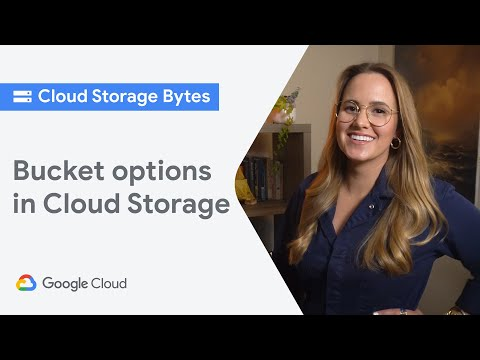

In [7]:
from IPython.display import YouTubeVideo

# Replace 'dQw4w9WgXcQ' with the unique video ID from your URL
YouTubeVideo('8DMOJ6Lgm7s', width=1060, height=500)

In [8]:
import requests
import pandas as pd

from google.cloud import storage


In [11]:
url = 'https://storage.googleapis.com/payment-patterns-brazil/brazilian_payment_methods.csv'
# Download the file
response = requests.get(url)

# Save the file locally
file_path = '/content/your_local_filename.csv'
with open(file_path, 'wb') as file:
    file.write(response.content)


# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.head()

,YearMonth,quantityPix,valuePix,quantityTED,valueTED,quantityTEC,valueTEC,quantityBankCheck,valueBankCheck,quantityBrazilianBoletoPayment,valueBrazilianBoletoPayment,quantityDOC,valueDOC
0,202405,5228826.97,2137205.79,69023.11,3482036.97,0.00,0.00,10467.85,40133.55,349180.92,506302.82,0.00,0.00
1,202404,4924681.00,2083746.68,70647.15,3652606.48,0.00,0.00,11179.22,43295.40,361633.28,524619.69,0.00,0.00
2,202403,4903392.34,1936188.21,67565.05,3333054.27,0.00,0.00,10122.46,36644.55,336435.46,469047.59,0.00,0.00
3,202402,4367133.78,1718217.65,65805.87,2981226.45,60.01,109.32,10373.38,37076.26,332269.47,463066.01,61.89,34.21
4,202401,4371541.99,1818473.97,70343.25,3337344.85,387.18,815.94,11919.12,41615.89,363550.32,516702.44,600.76,616.58


In [12]:
# Convert columns to appropriate types
df['YearMonth'] = pd.to_numeric(df['YearMonth'], errors='coerce')
df['quantityPix'] = pd.to_numeric(df['quantityPix'], errors='coerce')
df['valuePix'] = pd.to_numeric(df['valuePix'], errors='coerce')
df['quantityTED'] = pd.to_numeric(df['quantityTED'], errors='coerce')
df['valueTED'] = pd.to_numeric(df['valueTED'], errors='coerce')
df['quantityTEC'] = pd.to_numeric(df['quantityTEC'], errors='coerce')
df['valueTEC'] = pd.to_numeric(df['valueTEC'], errors='coerce')
df['quantityBankCheck'] = pd.to_numeric(df['quantityBankCheck'], errors='coerce')
df['valueBankCheck'] = pd.to_numeric(df['valueBankCheck'], errors='coerce')
df['quantityBrazilianBoletoPayment'] = pd.to_numeric(df['quantityBrazilianBoletoPayment'], errors='coerce')
df['valueBrazilianBoletoPayment'] = pd.to_numeric(df['valueBrazilianBoletoPayment'], errors='coerce')
df['quantityDOC'] = pd.to_numeric(df['quantityDOC'], errors='coerce')
df['valueDOC'] = pd.to_numeric(df['valueDOC'], errors='coerce')

# Drop rows with NaN values that resulted from conversion errors
df = df.dropna()

# Save the cleaned data back to a CSV
df.to_csv('path_to_cleaned_csv_file.csv', index=False)
df

,YearMonth,quantityPix,valuePix,quantityTED,valueTED,quantityTEC,valueTEC,quantityBankCheck,valueBankCheck,quantityBrazilianBoletoPayment,valueBrazilianBoletoPayment,quantityDOC,valueDOC
0,202405,5228826.97,2137205.79,69023.11,3482036.97,0.00,0.00,10467.85,40133.55,349180.92,506302.82,0.00,0.00
1,202404,4924681.00,2083746.68,70647.15,3652606.48,0.00,0.00,11179.22,43295.40,361633.28,524619.69,0.00,0.00
2,202403,4903392.34,1936188.21,67565.05,3333054.27,0.00,0.00,10122.46,36644.55,336435.46,469047.59,0.00,0.00
3,202402,4367133.78,1718217.65,65805.87,2981226.45,60.01,109.32,10373.38,37076.26,332269.47,463066.01,61.89,34.21
4,202401,4371541.99,1818473.97,70343.25,3337344.85,387.18,815.94,11919.12,41615.89,363550.32,516702.44,600.76,616.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,201605,0.00,0.00,38397.79,1284857.76,658.08,1242.92,49391.10,85525.27,210245.33,243361.74,15222.38,12172.78
97,201604,0.00,0.00,36144.63,1284108.75,586.71,1029.40,45938.34,79444.79,195789.71,226725.92,14376.42,11632.65
98,201603,0.00,0.00,37762.98,1387738.67,666.89,1250.64,50443.05,85203.32,207938.76,239690.04,15322.97,12303.86
99,201602,0.00,0.00,33986.29,1184928.57,576.42,1079.27,46957.82,79927.23,197575.71,225107.82,14455.60,11778.74


In [14]:
# prompt: convert dataframe to a json file

import json

# Convert the DataFrame to a JSON string
json_string = df.to_json(orient='records')

# Save the JSON string to a file
with open('path_to_json_file.json', 'w') as file:
    file.write(json_string)
